<a href="https://colab.research.google.com/github/rameshboggu36/Data_Analysis_Zomato_database/blob/master/Delhivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Delhivery Dataset: Feature Engineering and Hypothesis Testing:__

* Clean the raw dataset to get meaningful features from it.
* Perform Hypothesis testing on different scenarios.  

In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler,LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [158]:
!gdown --fuzzy https://drive.google.com/file/d/1QIAZ3Of5JmHXpNFN9NeMiTlikuCnB2F2/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1QIAZ3Of5JmHXpNFN9NeMiTlikuCnB2F2
To: /content/delhivery_data.csv
100% 55.6M/55.6M [00:00<00:00, 170MB/s]


In [159]:
df = pd.read_csv("/content/delhivery_data.csv")

In [160]:
df.tail()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630
144866,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 16:24:28.436231,70.039010,426.0,95.0,88.7319,4.484211,268.0,9.0,8.8088,29.777778


# __Data Preprocessing:__

* __Understanding the data__

In [161]:
df.shape

(144867, 24)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

we can see there are lots of object type dtypes. To change those to relevant dtypes, we will change the columns with time to datetime dtype.

In [163]:
time_columns = ['trip_creation_time', 'od_start_time', 'od_end_time', 'cutoff_timestamp']
for col in time_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [165]:
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867,144867,144867,144867.000000,144867.000000,141438,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,2018-09-22 13:34:23.659819264,2018-09-22 18:02:45.855230720,2018-09-23 10:04:31.395393024,961.262986,232.926567,2018-09-23 03:43:41.794807552,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000000,2018-09-12 00:10:27,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,2018-09-17 03:20:51.775845888,2018-09-17 08:05:40.886155008,2018-09-18 01:48:06.410121984,161.000000,22.000000,2018-09-17 19:52:04.750000128,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,2018-09-22 04:24:27.932764928,2018-09-22 08:53:00.116656128,2018-09-23 03:13:03.520212992,449.000000,66.000000,2018-09-22 22:02:55,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,2018-09-27 17:57:56.350054912,2018-09-27 22:41:50.285857024,2018-09-28 12:49:06.054018048,1634.000000,286.000000,2018-09-28 06:37:55,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.000000,2018-10-06 23:44:12,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000
std,NaN,NaN,NaN,1037.012769,344.755577,NaN,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530


 * __Handling null values__

In [166]:
df.isnull().sum()*100/len(df)

data                              0.000000
trip_creation_time                0.000000
route_schedule_uuid               0.000000
route_type                        0.000000
trip_uuid                         0.000000
source_center                     0.000000
source_name                       0.202254
destination_center                0.000000
destination_name                  0.180165
od_start_time                     0.000000
od_end_time                       0.000000
start_scan_to_end_scan            0.000000
is_cutoff                         0.000000
cutoff_factor                     0.000000
cutoff_timestamp                  2.366999
actual_distance_to_destination    0.000000
actual_time                       0.000000
osrm_time                         0.000000
osrm_distance                     0.000000
factor                            0.000000
segment_actual_time               0.000000
segment_osrm_time                 0.000000
segment_osrm_distance             0.000000
segment_fac

# as the percent of missing values is very less, we can remove these values from the data.

In [167]:
df.dropna(inplace=True)

In [168]:
df.isnull().sum()*100/len(df)

data                              0.0
trip_creation_time                0.0
route_schedule_uuid               0.0
route_type                        0.0
trip_uuid                         0.0
source_center                     0.0
source_name                       0.0
destination_center                0.0
destination_name                  0.0
od_start_time                     0.0
od_end_time                       0.0
start_scan_to_end_scan            0.0
is_cutoff                         0.0
cutoff_factor                     0.0
cutoff_timestamp                  0.0
actual_distance_to_destination    0.0
actual_time                       0.0
osrm_time                         0.0
osrm_distance                     0.0
factor                            0.0
segment_actual_time               0.0
segment_osrm_time                 0.0
segment_osrm_distance             0.0
segment_factor                    0.0
dtype: float64

* __Handling duplicate values__

In [169]:
df.duplicated().sum()

0

In [170]:
df.shape

(140909, 24)

# __Visualizing the Data__:

* __Univariate Analysis__

In [171]:
df.head(1)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.43566,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727


* Categorical data (route_type)

Text(0, 0.5, 'Frequency')

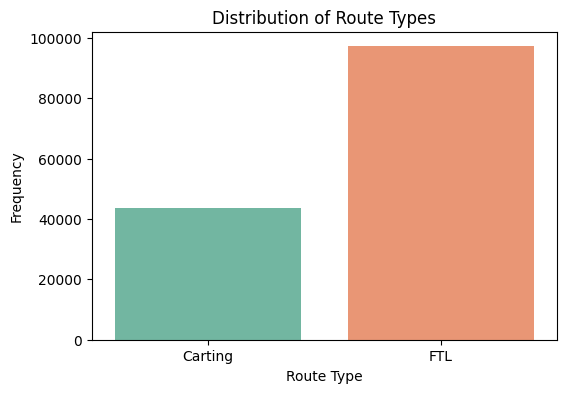

In [172]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='route_type', palette='Set2')
plt.title('Distribution of Route Types')
plt.xlabel('Route Type')
plt.ylabel('Frequency')

In [173]:
route_type_counts = df['route_type'].value_counts()

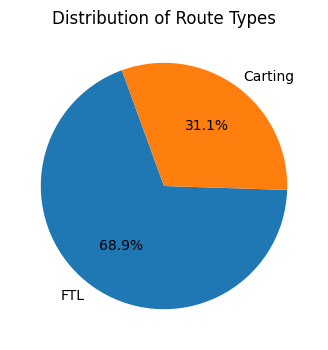

In [174]:
plt.figure(figsize=(6, 4))
plt.pie(route_type_counts, labels=route_type_counts.index, autopct='%1.1f%%', startangle=110)
plt.title('Distribution of Route Types')
plt.show()

* Categorical (source_name)

In [175]:
top_source_names = df['source_name'].value_counts().nlargest(15)
df_top_15 = df[df['source_name'].isin(top_source_names.index)]

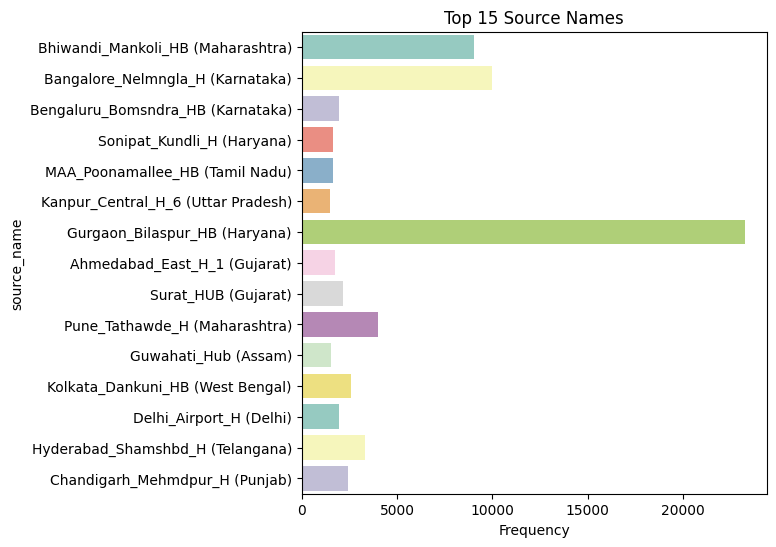

In [176]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df_top_15, y='source_name', palette='Set3')
plt.title('Top 15 Source Names')
plt.xlabel('Frequency')
plt.ylabel('source_name')
plt.show()

* Categorical (destination_name)

In [177]:
top_source_names = df['destination_name'].value_counts().nlargest(15)
df_des_top_15 = df[df['destination_name'].isin(top_source_names.index)]

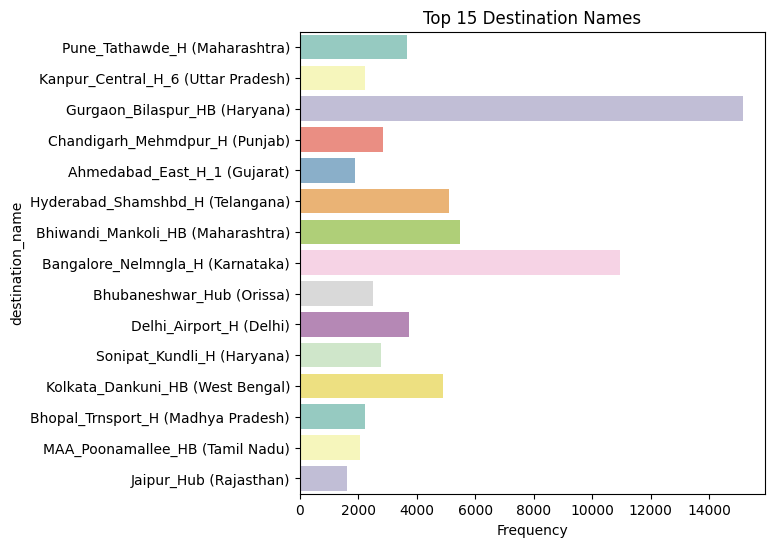

In [178]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df_des_top_15, y='destination_name', palette='Set3')
plt.title('Top 15 Destination Names')
plt.xlabel('Frequency')
plt.ylabel('destination_name')
plt.show()

* Numerical (actual_distance_to_destination)

In [179]:
print("   Descriptive Statistics of \nactual_distance_to_destination:")
print(df['actual_distance_to_destination'].describe())

   Descriptive Statistics of 
actual_distance_to_destination:
count    140909.000000
mean        239.042070
std         348.051439
min           9.000045
25%          23.381264
50%          66.450476
75%         308.035783
max        1927.447705
Name: actual_distance_to_destination, dtype: float64


Text(0.95, 0.95, 'Skewness: 1.95')

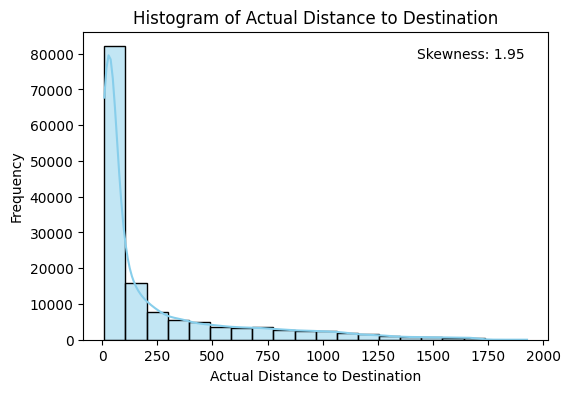

In [180]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='actual_distance_to_destination', bins=20, kde=True, color='skyblue')
plt.title('Histogram of Actual Distance to Destination')
plt.xlabel('Actual Distance to Destination')
plt.ylabel('Frequency')
skewness = df['actual_distance_to_destination'].skew()
plt.text(0.95, 0.95, f'Skewness: {skewness:.2f}', ha='right', va='top', transform=plt.gca().transAxes, fontsize=10, color='black')

# the distribution is right skewed.

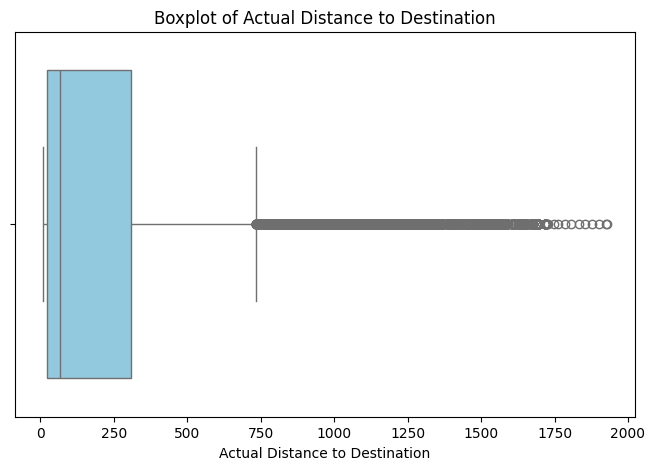

In [181]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='actual_distance_to_destination', color='skyblue')
plt.title('Boxplot of Actual Distance to Destination')
plt.xlabel('Actual Distance to Destination')
stats = df['actual_distance_to_destination'].describe()

* __to find the ouliers we can determine the lower fence and upper fense using IQR__:

In [182]:
Q1 = df['actual_distance_to_destination'].quantile(0.25)
Q3 = df['actual_distance_to_destination'].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Fence:", lower_fence)
print("Upper Fence:", upper_fence)

Q1: 23.38126422381325
Q3: 308.03578268961144
IQR: 284.65451846579816
Lower Fence: -403.60051347488394
Upper Fence: 735.0175603883087


* Q1 = 23.352026892994942
* Q3 = 286.9192937699907
* IQR = Q1 - Q3 = 263.56726687699575
* Lower Fence = Q1 - 1.5IQR = -371.99887342249866
* Upper Fence = Q3 + 1.5IQR = 682.2701940854843

Text(0, 0.5, 'Density')

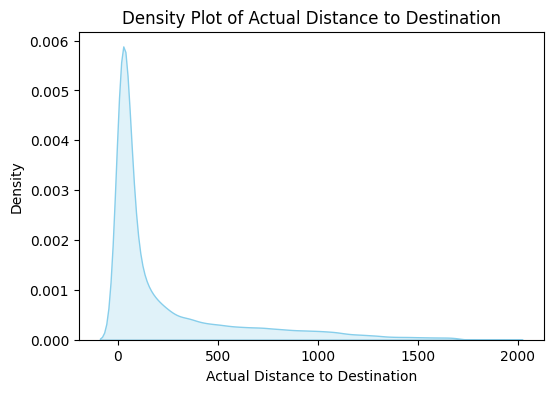

In [183]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x='actual_distance_to_destination', shade=True, color='skyblue')
plt.title('Density Plot of Actual Distance to Destination')
plt.xlabel('Actual Distance to Destination')
plt.ylabel('Density')

* Numerical (osrm_distance)

In [184]:
print("   Descriptive Statistics of \osrm_distance:")
print(df['osrm_distance'].describe())

   Descriptive Statistics of \osrm_distance:
count    140909.000000
mean        290.762437
std         424.893118
min           9.008200
25%          30.052700
50%          80.557600
75%         358.707400
max        2326.199100
Name: osrm_distance, dtype: float64


Text(0.95, 0.95, 'Skewness: 2.01')

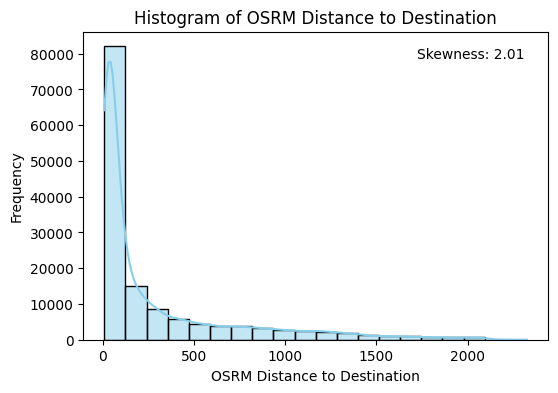

In [185]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='osrm_distance', bins=20, kde=True, color='skyblue')
plt.title('Histogram of OSRM Distance to Destination')
plt.xlabel('OSRM Distance to Destination')
plt.ylabel('Frequency')
skewness = df['osrm_distance'].skew()
plt.text(0.95, 0.95, f'Skewness: {skewness:.2f}', ha='right', va='top', transform=plt.gca().transAxes, fontsize=10, color='black')

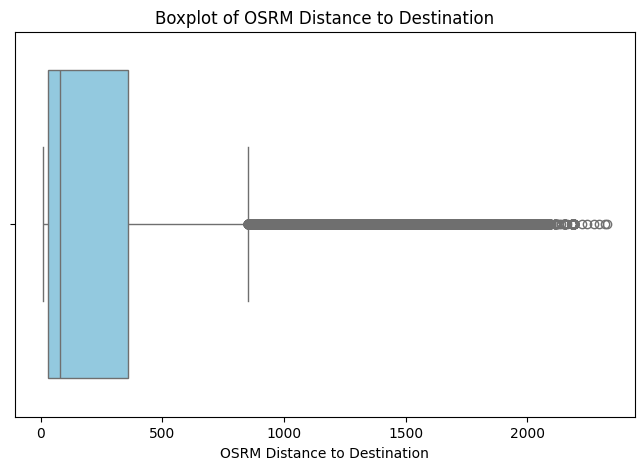

In [186]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='osrm_distance', color='skyblue')
plt.title('Boxplot of OSRM Distance to Destination')
plt.xlabel('OSRM Distance to Destination')
stats = df['osrm_distance'].describe()

In [187]:
Q1 = df['osrm_distance'].quantile(0.25)
Q3 = df['osrm_distance'].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Fence:", lower_fence)
print("Upper Fence:", upper_fence)

Q1: 30.0527
Q3: 358.7074
IQR: 328.6547
Lower Fence: -462.92934999999994
Upper Fence: 851.68945


Text(0, 0.5, 'Density')

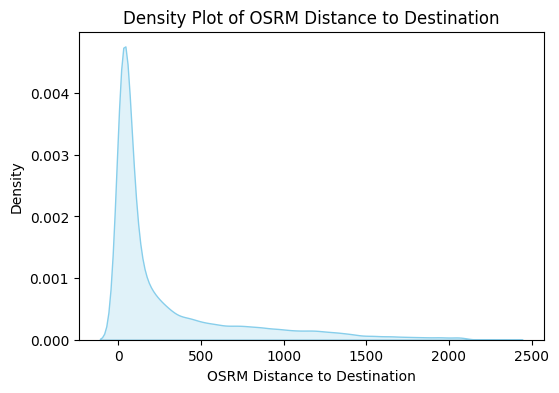

In [188]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x='osrm_distance', shade=True, color='skyblue')
plt.title('Density Plot of OSRM Distance to Destination')
plt.xlabel('OSRM Distance to Destination')
plt.ylabel('Density')

In [189]:
df.head(1)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.43566,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727


* __Bivariate Analysis__:

* Numerical - Numerical (actual_distance_to_destination, actual_time)

Text(0, 0.5, 'Actual Time')

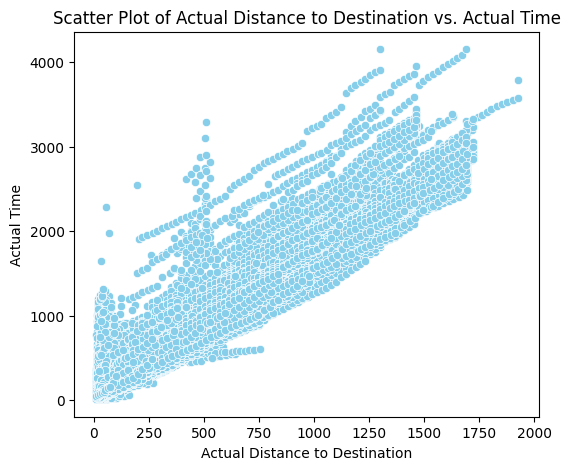

In [190]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='actual_distance_to_destination', y='actual_time', color='skyblue')
plt.title('Scatter Plot of Actual Distance to Destination vs. Actual Time')
plt.xlabel('Actual Distance to Destination')
plt.ylabel('Actual Time')

In [191]:
correlation = df[['actual_distance_to_destination', 'actual_time']].corr().iloc[0, 1]
print("Correlation coefficient between actual_distance_to_destination and actual_time:", correlation)

Correlation coefficient between actual_distance_to_destination and actual_time: 0.9791056323251847


* Numerical - Numerical (osrm_distance_to_destination - osrm_time)

Text(0, 0.5, 'OSRM Time')

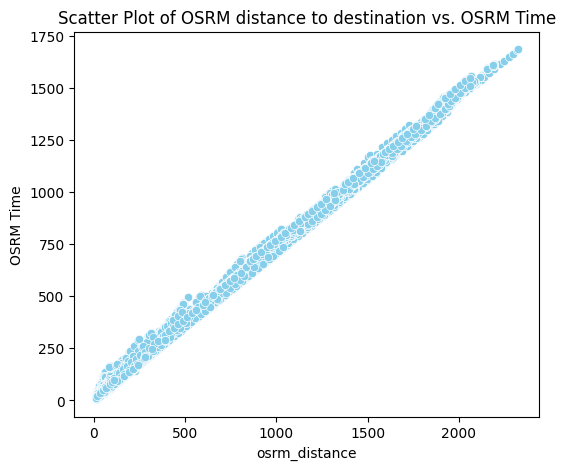

In [192]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='osrm_distance', y='osrm_time', color='skyblue')
plt.title('Scatter Plot of OSRM distance to destination vs. OSRM Time')
plt.xlabel('osrm_distance')
plt.ylabel('OSRM Time')

In [193]:
correlation = df[['osrm_distance', 'osrm_time']].corr().iloc[0, 1]
print("Correlation coefficient between osrm_distance and osrm_time:", correlation)

Correlation coefficient between osrm_distance and osrm_time: 0.9991253053224848


* Numerical - Numerical ()

Text(0, 0.5, 'OSRM Distance')

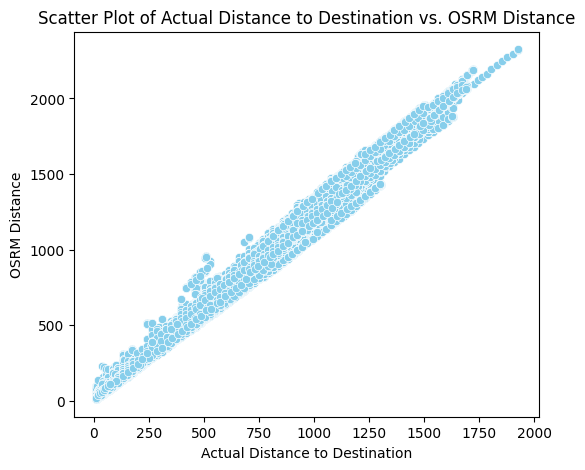

In [194]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='actual_distance_to_destination', y='osrm_distance', color='skyblue')
plt.title('Scatter Plot of Actual Distance to Destination vs. OSRM Distance')
plt.xlabel('Actual Distance to Destination')
plt.ylabel('OSRM Distance')

In [195]:
correlation_actual_osrm = df[['actual_distance_to_destination', 'osrm_distance']].corr().iloc[0, 1]
print("Correlation coefficient between Actual Distance to Destination and OSRM Distance:", correlation_actual_osrm)

Correlation coefficient between Actual Distance to Destination and OSRM Distance: 0.9971322917112606


* Numerical - Categorical (actual_time - route_type)

Text(0, 0.5, 'Actual Time')

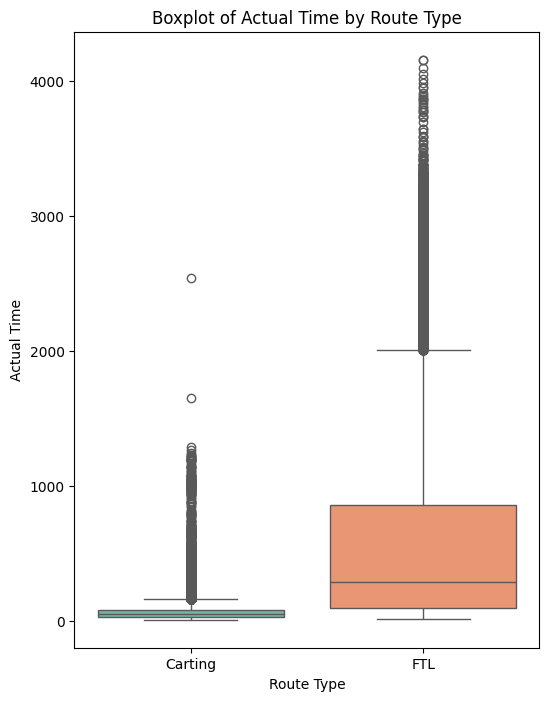

In [196]:
plt.figure(figsize=(6, 8))
sns.boxplot(data=df, x='route_type', y='actual_time', palette='Set2')
plt.title('Boxplot of Actual Time by Route Type')
plt.xlabel('Route Type')
plt.ylabel('Actual Time')

Text(0, 0.5, 'Mean Actual Time')

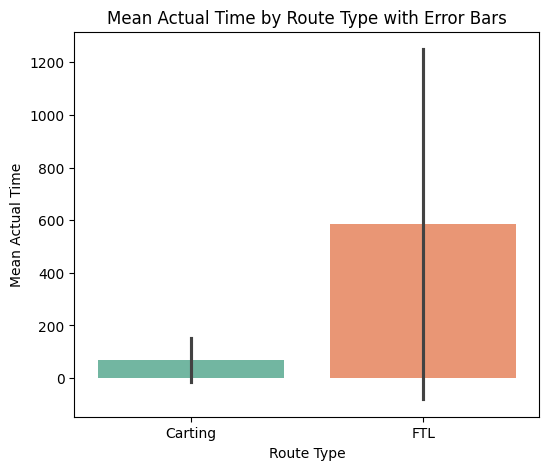

In [197]:
plt.figure(figsize=(6,5))
sns.barplot(data=df, x='route_type', y='actual_time', palette='Set2', ci='sd')
plt.title('Mean Actual Time by Route Type with Error Bars')
plt.xlabel('Route Type')
plt.ylabel('Mean Actual Time')

Text(0, 0.5, 'Actual Time')

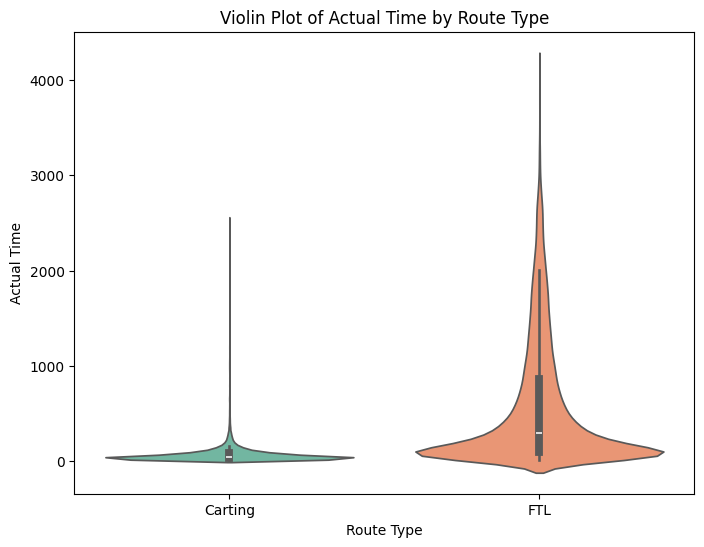

In [198]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='route_type', y='actual_time', palette='Set2')
plt.title('Violin Plot of Actual Time by Route Type')
plt.xlabel('Route Type')
plt.ylabel('Actual Time')

 * Numerical - Categorical (osrm_time - route_type)

Text(0, 0.5, 'OSRM Time')

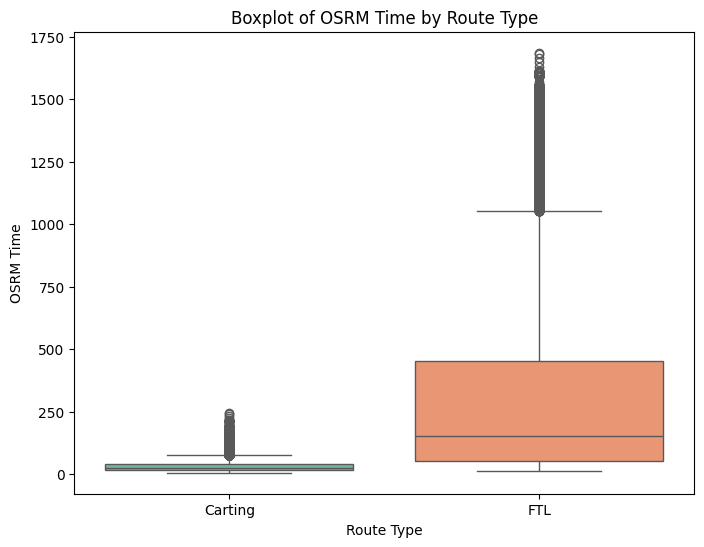

In [199]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='route_type', y='osrm_time', palette='Set2')
plt.title('Boxplot of OSRM Time by Route Type')
plt.xlabel('Route Type')
plt.ylabel('OSRM Time')

Text(0, 0.5, 'OSRM Time')

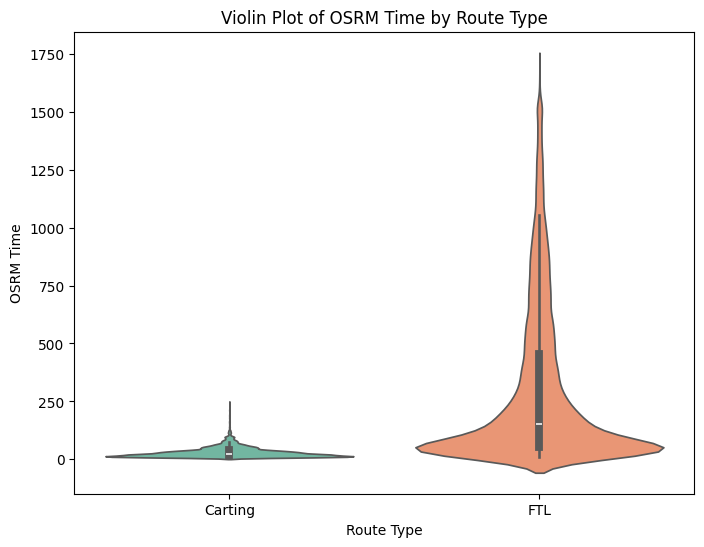

In [200]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='route_type', y='osrm_time', palette='Set2')
plt.title('Violin Plot of OSRM Time by Route Type')
plt.xlabel('Route Type')
plt.ylabel('OSRM Time')

Text(0, 0.5, 'Mean OSRM Time')

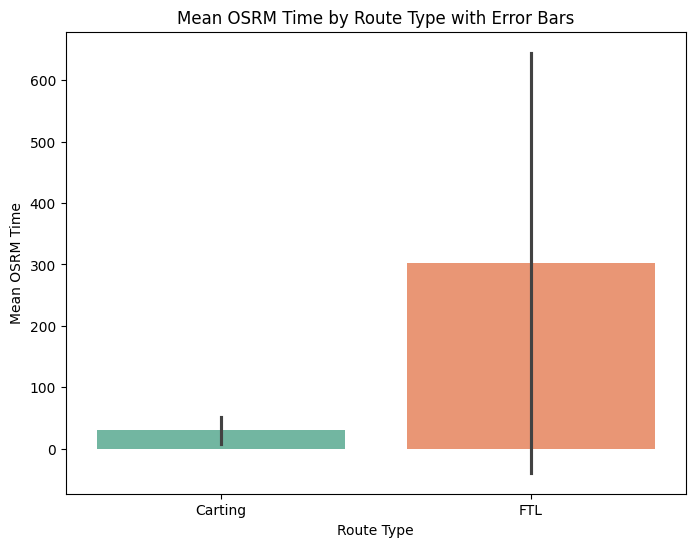

In [201]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='route_type', y='osrm_time', palette='Set2', ci='sd')
plt.title('Mean OSRM Time by Route Type with Error Bars')
plt.xlabel('Route Type')
plt.ylabel('Mean OSRM Time')

* __Feature Scaling__:

# __Feature Engineering__

* __Feature Construction__

In [202]:
df.head(1)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.43566,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727


* we create a new column with the total duration of the order.

In [203]:
df['duration_of_order'] = (df['od_end_time'] - df['od_start_time']).dt.total_seconds()/3600

In [204]:
df.head(1)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,duration_of_order
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,10.43566,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,1.436894


In [205]:
df['destination_name'][0]

'Khambhat_MotvdDPP_D (Gujarat)'

In [206]:
state = []
city=[]
date_after_split = df["destination_name"].str.split(r'(')
for i in date_after_split:
  state.append(i[1][:-1])
  city.append(i[0].split('_')[0])
df["state"] = state
df["city"] = city


In [207]:
df.head(1)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,duration_of_order,state,city
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,1.436894,Gujarat,Khambhat


In [208]:
df= df.replace(["Bangalore","PNQ Rahatani DPC ","PNQ Vadgaon Sheri DPC ","PNQ Pashan DPC ","Pune Balaji Nagar ","HBR Layout PC ","Bhopal MP Nagar ","Mumbai Antop Hill "],["Bengaluru", "Pune","Pune","Pune","Pune","Bengaluru","Bhopal","Mumbai"])


In [214]:
df['trip_creation_month'] = df['trip_creation_time'].dt.month_name()

* __Feature Selection__

# here source_center and source_name refers to same place, similarly destination_center and destination_name. So, instead of using 4 columns, we use one of them, i.e., source_name and destination_name

In [209]:
df.drop(['source_center', 'destination_center'], axis=1, inplace=True)

In [210]:
df.drop(["is_cutoff","cutoff_factor","cutoff_timestamp","factor","segment_factor"], axis=1, inplace=True)

In [215]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,duration_of_order,state,city,trip_creation_month
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,14.0,11.0,11.9653,14.0,11.0,11.9653,1.436894,Gujarat,Khambhat,September
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,24.0,20.0,21.7243,10.0,9.0,9.7590,1.436894,Gujarat,Khambhat,September
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,62.0,40.0,45.5620,21.0,12.0,13.0224,1.436894,Gujarat,Khambhat,September
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,68.0,44.0,54.2181,6.0,5.0,3.9153,1.436894,Gujarat,Khambhat,September
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,...,15.0,11.0,12.1171,15.0,11.0,12.1171,1.819553,Gujarat,Anand,September


In [216]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_name', 'destination_name', 'od_start_time',
       'od_end_time', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'duration_of_order', 'state', 'city',
       'trip_creation_month'],
      dtype='object')

# __Hypothesis Testing__:

* __H0: actual_distance_to_destination and osrm_distance are _same___
* __HA: actual_distance_to_destination and osrm_distance are _different___
* __Confidence Level: 95%, alpha = 0.05__

In [218]:
No_of_bikesrental_workingday = df['actual_distance_to_destination'].values
No_of_bikesrental_nonworkingday = df['osrm_distance'].values
alpha = 0.05
t_stat, p_value = ttest_ind(No_of_bikesrental_workingday,No_of_bikesrental_nonworkingday)
print("t_stat ", t_stat)
print("p value : ", p_value)
if(p_value<alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

t_stat  -35.34777270006395
p value :  4.325085403491688e-273
Reject Null Hypothesis


* That means actual distance to destination is not similar to algorithm generated distance. algorithm needs to be improved

* __H0: actual_time and osrm_time are _same___
* __HA: actual_time and osrm_time are _different___
* __Confidence Level: 95%, alpha = 0.05__

In [219]:
No_of_bikesrental_workingday = df['actual_time'].values
No_of_bikesrental_nonworkingday = df['osrm_time'].values
alpha = 0.05
t_stat, p_value = ttest_ind(No_of_bikesrental_workingday,No_of_bikesrental_nonworkingday)
print("t_stat ", t_stat)
print("p value : ", p_value)
if(p_value<alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

t_stat  114.16485192692413
p value :  0.0
Reject Null Hypothesis


* __H0: actual_time and segment_actual_time are _same___
* __HA: actual_time and segment_actual_time are _different___
* __Confidence Level: 95%, alpha = 0.05__

In [220]:
No_of_bikesrental_workingday = df['actual_time'].values
No_of_bikesrental_nonworkingday = df['segment_actual_time'].values
alpha = 0.05
t_stat, p_value = ttest_ind(No_of_bikesrental_workingday,No_of_bikesrental_nonworkingday)
print("t_stat ", t_stat)
print("p value : ", p_value)
if(p_value<alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

t_stat  241.0725811285076
p value :  0.0
Reject Null Hypothesis
